# Time series forecasting for Bitcoin ₿


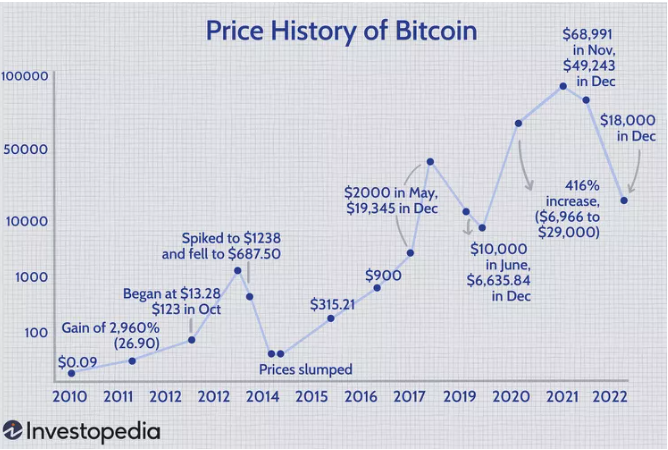

Bitcoin is a decentralized digital currency that can be transferred on the peer-to-peer bitcoin network. Bitcoin transactions are verified by network nodes through cryptography and recorded in a public distributed ledger called a blockchain. The cryptocurrency was invented in 2008 by an unknown person or group of people using the name Satoshi Nakamoto.The currency began use in 2009, when its implementation was released as open-source software.


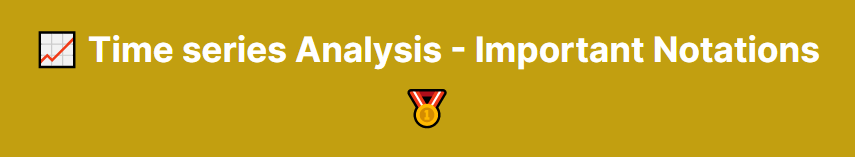

#### 📘 1. Time Series Stationarity
 When a time series is stationary, its statistical properties like mean, variance, and autocorrelation remain constant over time. This means that the values of the series are not dependent on time and there are no seasonal effects. Autocorrelation measures the correlation between a series and its past values.
 
#### 📘 2. Trend
A trend in a time series shows its overall direction over a long period of time. 📊

#### 📘 3. Seasonality
Seasonality in a time series is the pattern that repeats itself with respect to timing, direction, and magnitude. For example, an increase in water consumption during summer due to hot weather conditions.

#### 📘 4. Cyclical Component
Cyclical components are trends that do not have a specific repetition over a particular period. 🔄

#### 📘 5. Irregular Variation
Irregular variation is the fluctuation in time series data that is unpredictable and may or may not be random. 🔀

#### 📘 6. ETS Decomposition
ETS decomposition is used to break down a time series into its individual components, including error, trend, and seasonality. 🔍

#### 📘 7. Dependence
Dependence refers to the association between two observations of the same variable at prior time periods. 🔗

#### 📘 8. Differencing
Differencing is a method used to make a time series stationary and control autocorrelations. 🔃

#### 📘 9. Modelling
Modelling involves using statistical techniques to identify patterns and relationships in the time series data. These models can be used to make predictions and inform decision-making. Some common models used in time series analysis include ARIMA, SARIMA, and exponential smoothing. The choice of model depends on the specific characteristics of the time series data and the objectives of the analysis. The model selected should provide a good fit to the data and accurate predictions. Once a model has been developed, it can be used to forecast future values of the time series and provide insights into trends, patterns, and relationships that can inform decision-making.

## <span style='color:purple '> 1. Load Data </span>


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

bitcoin1 = pd.read_csv(r'C:\Users\User\Downloads/bitcoin.csv')
bitcoin1.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


## <span style='color:purple '> 2. EDA on Bitcoin Data </span>

### 2.1 Check any null values present

In [3]:
bitcoin1.isnull().sum()

date            0
price           0
total_volume    0
market_cap      1
coin_name       0
dtype: int64

### 2.2 Plot a few of pricing data

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px


In [5]:
#converting the "date" column to a datetime format
start_date = pd.to_datetime(bitcoin1.date[0])
end_date = pd.to_datetime(bitcoin1.date.values[-1])
bitcoin1['date'] = pd.to_datetime(bitcoin1['date'])


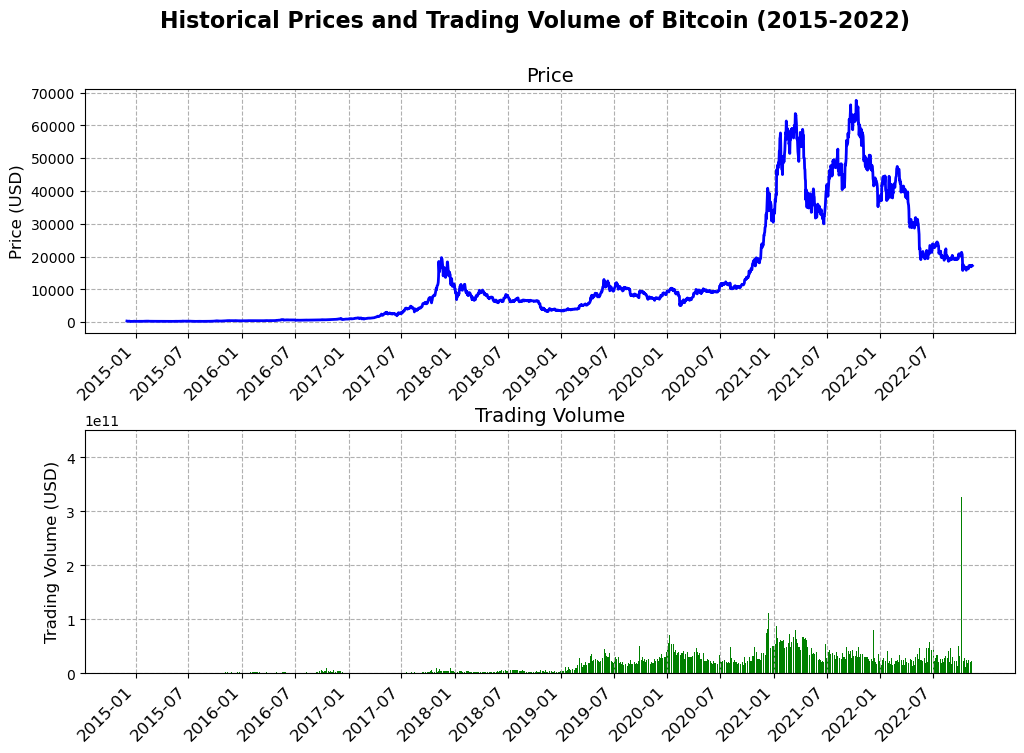

In [6]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot the price data on the first subplot
ax1.plot(bitcoin1['date'], bitcoin1['price'], color='blue', linewidth=2)
ax1.set_ylabel('Price (USD)', fontsize=12)

# Plot the trading volume data on the second subplot
ax2.bar(bitcoin1['date'], bitcoin1['total_volume'], color='green')
ax2.set_ylabel('Trading Volume (USD)', fontsize=12)

# Set the title of the figure and the subplots
fig.suptitle('Historical Prices and Trading Volume of Bitcoin (2015-2022)', fontsize=16, fontweight='bold')
ax1.set_title('Price', fontsize=14)
ax2.set_title('Trading Volume', fontsize=14)

# Customize the x-axis tick labels to show the year and month
date_fmt = '%Y-%m'
date_ticks = pd.date_range(start=bitcoin1['date'].min(), end=bitcoin1['date'].max(), freq='6M')
ax1.set_xticks(date_ticks)
ax2.set_xticks(date_ticks)
ax1.xaxis.set_ticklabels(date_ticks.strftime(date_fmt), fontsize=12, rotation=45, ha='right')
ax2.xaxis.set_ticklabels(date_ticks.strftime(date_fmt), fontsize=12, rotation=45, ha='right')

# Add gridlines to the subplots
ax1.grid(True, linestyle='--')
ax2.grid(True, linestyle='--')

# Add padding to the bottom of the second subplot to prevent overlap with the x-axis labels
fig.subplots_adjust(hspace=0.4, bottom=0.15)

# Display the plot
plt.show()

### 2.3 Correlation

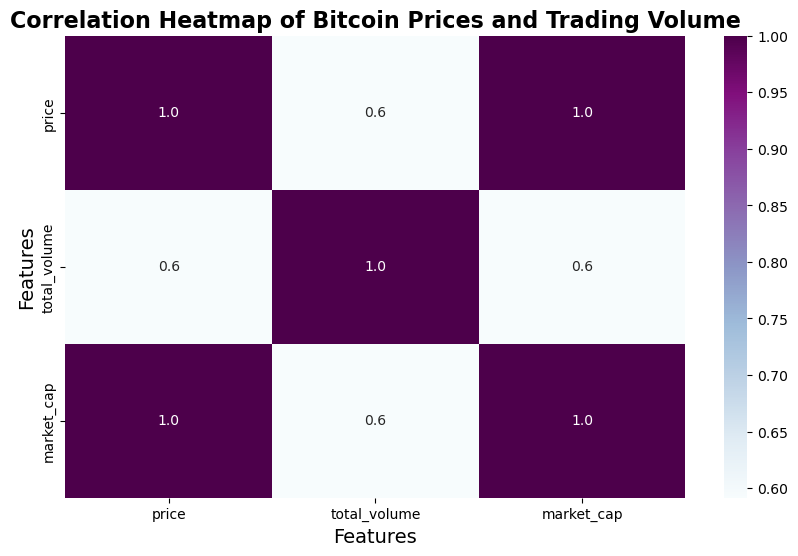

In [7]:
import seaborn as sns

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
dataplot = sns.heatmap(bitcoin1[['price', 'total_volume', 'market_cap']].corr(), cmap="BuPu", annot=True, fmt=".1f")

# Set the title and labels of the plot
plt.title('Correlation Heatmap of Bitcoin Prices and Trading Volume', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Display the plot
plt.show()

## Observation

"Price" and "Market_Cap" are highly correlated features, as they both represent the value of Bitcoin in terms of USD. In fact, "Market_Cap" can be calculated by multiplying the "Price" by the "Total_Volume" of Bitcoin traded.

### 2.5 Stationarity

When working with time series data, it is important to ensure that the data is stationary, meaning that the statistical properties of the data, such as mean and variance, do not change over time. One way to check for stationarity is to use statistical tests such as the Augmented Dickey-Fuller (ADF) test or the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on "Price" column of "bitcoin1" DataFrame
result = adfuller(bitcoin1['price'])

# Print test statistic and p-value
print(f'Test statistic: {result[0]}')
print(f'p-value: {result[1]}')

Test statistic: -1.6959245009949435
p-value: 0.4332135104793128


### <span style='color:red '> Main Takeaway </span>

The ADF test result you provided shows a p-value of 0.4332 for the "Price" column of the "bitcoin1" DataFrame. Since this p-value is greater than the critical value of 0.05, we cannot reject the null hypothesis that the time series has a unit root, meaning that the "Price" column is non-stationary.

## <span style='color:purple '> 3. Time Series Analysis ⏳</span>

Time series analysis is a statistical method used to analyze time-based data. In the case of Bitcoin, we can use time series analysis to analyze the trend of its price over time. The price feature of Bitcoin is a continuous variable that changes with time, and hence it is a time series.



Time series analysis is a statistical method used to analyze time-based data. In the case of Bitcoin, we can use time series analysis to analyze the trend of its price over time. The price feature of Bitcoin is a continuous variable that changes with time, and hence it is a time series.



## <span style='color:blue '> Model that we will be using </span>
### <span style='color:orange '> ARIMA📜 </span>
### <span style='color: silver '> LSTM📜 </span>
### <span style='color:green '> Prophet📜 </span>


### <span style='color:orange '> 1. ARIMA📜 </span>

3 parameters will be needed to create ARIMA model

-The number of AR (autoregressive) terms (p): This parameter represents the number of lagged values of the time series to include in the model. It captures the effect of past values on the current value of the series.

-The number of differences (d): This parameter represents the degree of differencing required to make the time series stationary. It captures the effect of removing the trend from the series.

-The number of MA (moving average) terms (q): This parameter represents the number of lagged errors of the time series to include in the model. It captures the effect of past errors on the current value of the series.

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 2321
Model:                 ARIMA(2, 1, 3)   Log Likelihood              -18035.592
Date:                Tue, 07 Mar 2023   AIC                          36083.185
Time:                        23:03:16   BIC                          36117.681
Sample:                             0   HQIC                         36095.756
                               - 2321                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5723      0.003   -184.904      0.000      -0.578      -0.566
ar.L2         -0.9899      0.002   -419.676      0.000      -0.995      -0.985
ma.L1          0.5547      0.009     64.914      0.0

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


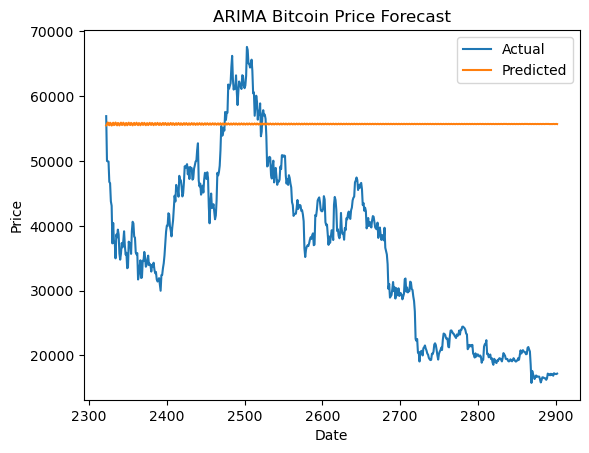

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(bitcoin1) * 0.8)
train, test = bitcoin1.iloc[:train_size], bitcoin1.iloc[train_size:]
model = ARIMA(train['price'], order=(2, 1, 3))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.forecast(len(test))
plt.plot(test.index, test['price'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('ARIMA Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### <span style='color: silver '> 2. LSTM📜 </span>

In [47]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 8.8 MB/s eta 0:00:00
     ------------------------------------- 439.2/439.2 kB 13.8 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 7.8 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 7.1 MB/s eta 0:00:00
     ------------------------------------- 177.2/177.2 kB 10.4 MB/s eta 0:00:00
     -------------------------------------- 781.

Epoch 1/100
71/71 [==============================] - 4s 13ms/step - loss: 0.0040
Epoch 2/100
71/71 [==============================] - 1s 12ms/step - loss: 4.0806e-04
Epoch 3/100
71/71 [==============================] - 1s 13ms/step - loss: 3.9074e-04
Epoch 4/100
71/71 [==============================] - 1s 14ms/step - loss: 3.5791e-04
Epoch 5/100
71/71 [==============================] - 1s 14ms/step - loss: 3.9330e-04
Epoch 6/100
71/71 [==============================] - 1s 13ms/step - loss: 3.6707e-04
Epoch 7/100
71/71 [==============================] - 1s 15ms/step - loss: 2.9809e-04
Epoch 8/100
71/71 [==============================] - 1s 15ms/step - loss: 2.9369e-04
Epoch 9/100
71/71 [==============================] - 1s 13ms/step - loss: 2.6157e-04
Epoch 10/100
71/71 [==============================] - 1s 13ms/step - loss: 2.5262e-04
Epoch 11/100
71/71 [==============================] - 1s 12ms/step - loss: 2.4914e-04
Epoch 12/100
71/71 [==============================] - 1s 13ms/step 

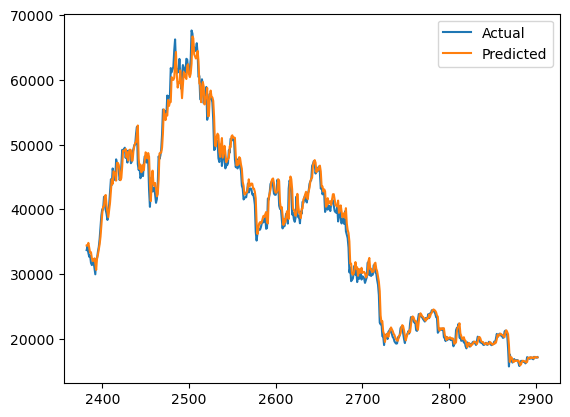

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


bitcoin1 = bitcoin1[['price']] # Only keep the "price" column
scaler = MinMaxScaler()
bitcoin_scaled = scaler.fit_transform(bitcoin1)

# Split the data into training and testing sets
train_size = int(len(bitcoin_scaled) * 0.8)
test_size = len(bitcoin_scaled) - train_size
train_data, test_data = bitcoin_scaled[0:train_size,:], bitcoin_scaled[train_size:len(bitcoin_scaled),:]

# Define a function to create sequences for LSTM
def create_sequences(dataset, seq_length):
    data_X, data_Y = [], []
    for i in range(len(dataset)-seq_length):
        x = dataset[i:(i+seq_length), 0]
        y = dataset[i+seq_length, 0]
        data_X.append(x)
        data_Y.append(y)
    return np.array(data_X), np.array(data_Y)

# Create sequences for training and testing
seq_length = 60
train_X, train_Y = create_sequences(train_data, seq_length)
test_X, test_Y = create_sequences(test_data, seq_length)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(train_X, train_Y, epochs=100, batch_size=32)

# Make predictions on the testing set
test_predictions = model.predict(test_X)
test_predictions = scaler.inverse_transform(test_predictions)

# Visualize the results
plt.plot(bitcoin1.index[train_size+seq_length:], bitcoin1[train_size+seq_length:], label='Actual')
plt.plot(bitcoin1.index[train_size+seq_length:], test_predictions, label='Predicted')
plt.legend()
plt.show()


### <span style='color:green '> 3. Prophet 📗</span>

In [62]:
import pystan
from prophet import Prophet

In [51]:
bitcoin1.head()

,price
0,313.992
1,314.446
2,286.572
3,260.936
4,273.220


In [57]:
bitcoin2 = pd.read_csv(r'C:\Users\User\Downloads/bitcoin.csv')
bitcoin2.head()
#converting the "date" column to a datetime format
start_date = pd.to_datetime(bitcoin2.date[0])
end_date = pd.to_datetime(bitcoin2.date.values[-1])
bitcoin2['date'] = pd.to_datetime(bitcoin2['date'])


In [58]:
bitcoin2 = bitcoin2[['date', 'price']]

In [59]:
bitcoin2.head()

,date,price
0,2015-01-01,313.992
1,2015-01-02,314.446
2,2015-01-03,286.572
3,2015-01-04,260.936
4,2015-01-05,273.220


In [60]:
#renaming columns
bitcoin2.rename(columns={"date": "ds"}, inplace = True)
bitcoin2.rename(columns={"price":"y"}, inplace = True)
bitcoin2.head(3)

,ds,y
0,2015-01-01,313.992
1,2015-01-02,314.446
2,2015-01-03,286.572


In [63]:
model_obj = Prophet(interval_width = 0.90, daily_seasonality = True)
model = model_obj.fit(bitcoin2)

DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (E:\anaconda\lib\site-packages\prophet\stan_model\cmdstan-2.26.1\stan\lib\stan_math\lib\tbb) to PATH
DEBUG:cmdstanpy:input tempfile: C:\Users\User\AppData\Local\Temp\tmp5f65xydl\89iq2r85.json
DEBUG:cmdstanpy:input tempfile: C:\Users\User\AppData\Local\Temp\tmp5f65xydl\vrwxlk4s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['E:\\anaconda\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=43302', 'data', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmp5f65xydl\\89iq2r85.json', 'init=C:\\Users\\User\\AppData\\Local\\Temp\\tmp5f65xydl\\vrwxlk4s.json', 'output', 'file=C:\\Users\\User\\AppData\\Local\\Temp\\tmp5f65xydl\\prophet_modelh9lo2qql\\prophet_model-20230308010904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:09:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:0

In [65]:
#Making predictions
future = model_obj.make_future_dataframe(periods = 200, freq ="D")
forecast = model_obj.predict(future)
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01,1002.036838,-5814.474365,8836.610017,1002.036838,1002.036838,845.344695,845.344695,845.344695,-1055.463071,...,26.804088,26.804088,26.804088,1874.003678,1874.003678,1874.003678,0.0,0.0,0.0,1847.381534
1,2015-01-02,1003.145562,-5459.177712,9415.414446,1003.145562,1003.145562,845.402594,845.402594,845.402594,-1055.463071,...,-16.730693,-16.730693,-16.730693,1917.596358,1917.596358,1917.596358,0.0,0.0,0.0,1848.548156
2,2015-01-03,1004.254285,-5379.261825,9211.128019,1004.254285,1004.254285,885.089940,885.089940,885.089940,-1055.463071,...,-6.995151,-6.995151,-6.995151,1947.548162,1947.548162,1947.548162,0.0,0.0,0.0,1889.344225


In [66]:
forecast[["ds", "yhat","yhat_upper", "yhat_lower"]].head(3)

,ds,yhat,yhat_upper,yhat_lower
0,2015-01-01,1847.381534,8836.610017,-5814.474365
1,2015-01-02,1848.548156,9415.414446,-5459.177712
2,2015-01-03,1889.344225,9211.128019,-5379.261825


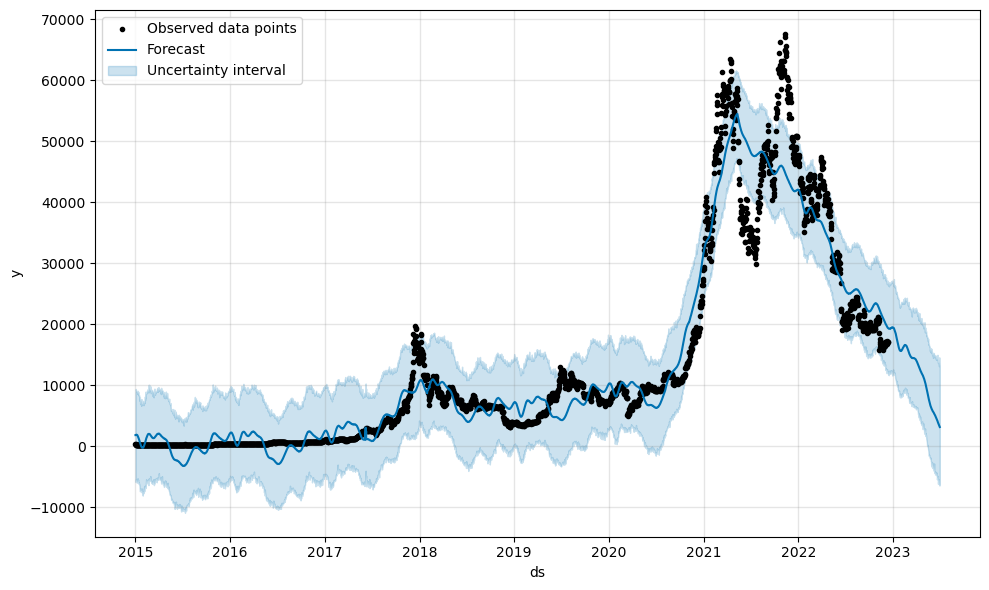

In [67]:
#The last 200 data is the forecast for the next 200 days

#The black dots are the actual data points and the blue line is the forecast with upper bounds.

#lower bounds indicated by the blue shaded area.

model_obj.plot(forecast, include_legend = True)
plt.show()

In [70]:
# calculate MAE between expected and predicted values
#forecast['yhat'][-212:-200].values
from sklearn.metrics import mean_absolute_error
y_true = bitcoin2['y'].values
y_pred = forecast['yhat'][:-200].values
mae = mean_absolute_error(y_true, y_pred)
print('Mean Absolute Error: %.3f' % mae)

Mean Absolute Error: 3016.174


- So, the mae is 3016.174
- It means that there is an average error of 3016.174
- between our actual value and the predicted value, which is not bad.
- The predicted outcomes can be plotted and compared with the actual values.

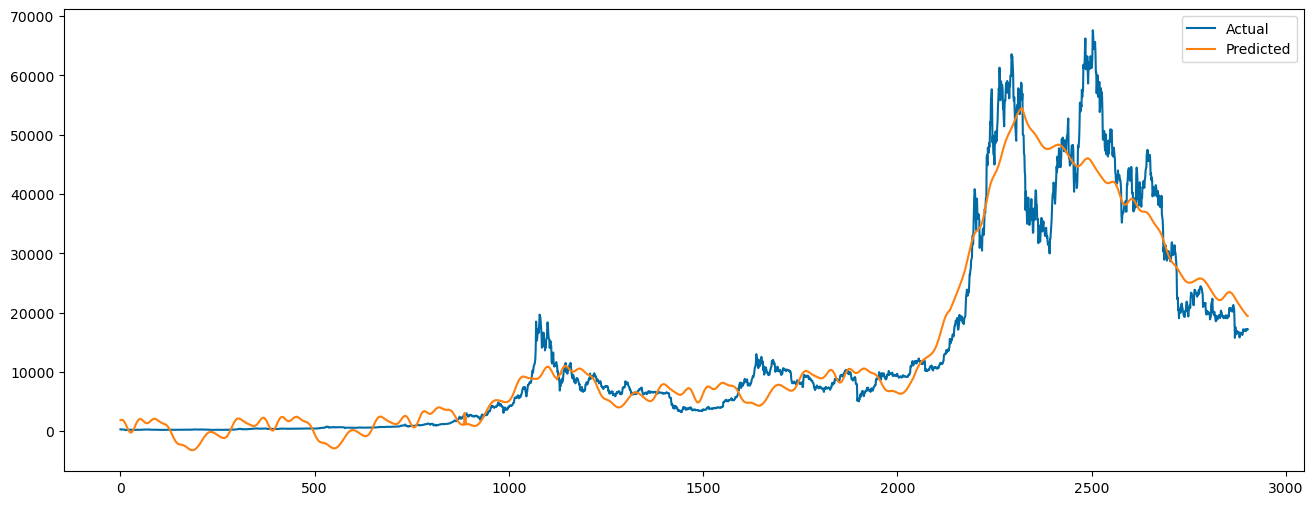

In [71]:
#The above figure demonstrates the actual and predicted curve of the traffic of sales.
plt.figure(figsize=(16,6))
plt.style.use("tableau-colorblind10")
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

<Figure size 1600x600 with 0 Axes>

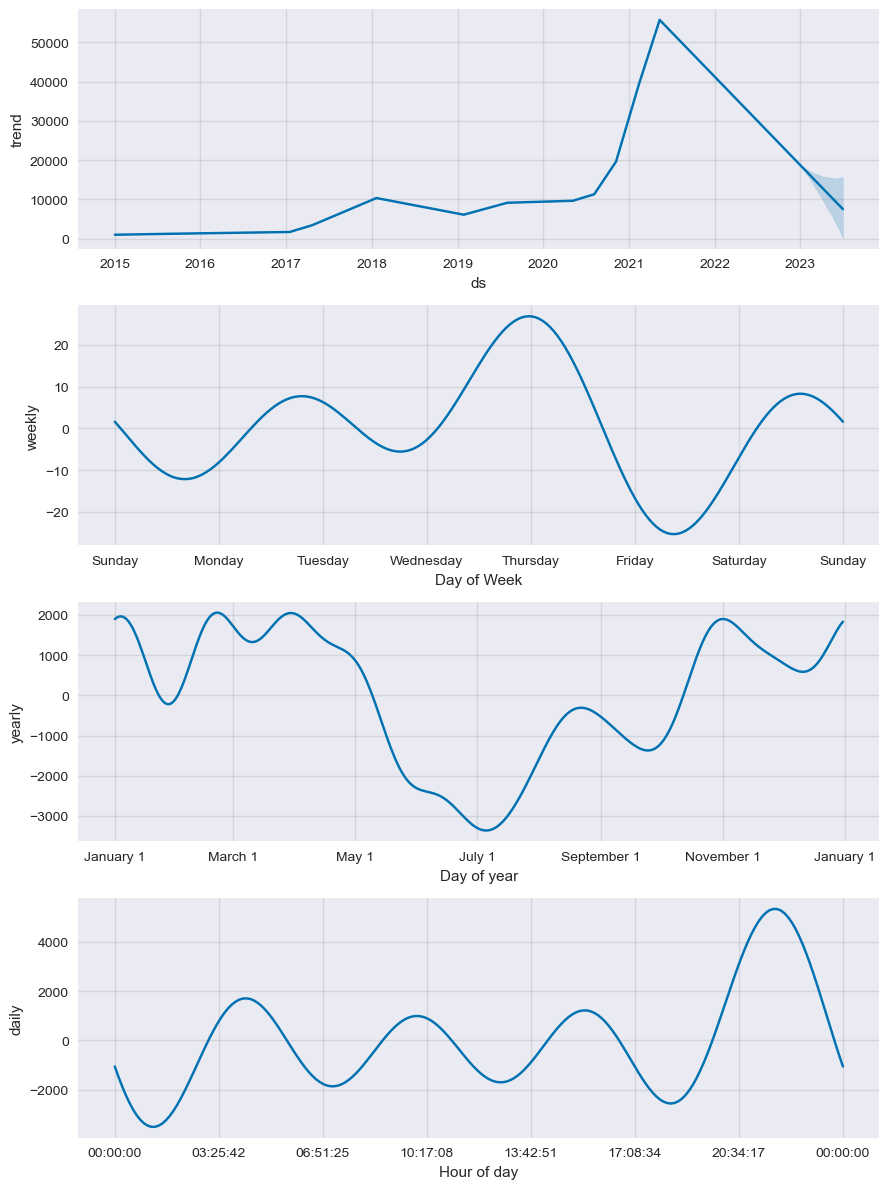

In [73]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn')
plot  = model_obj.plot_components(forecast)
plt.show()

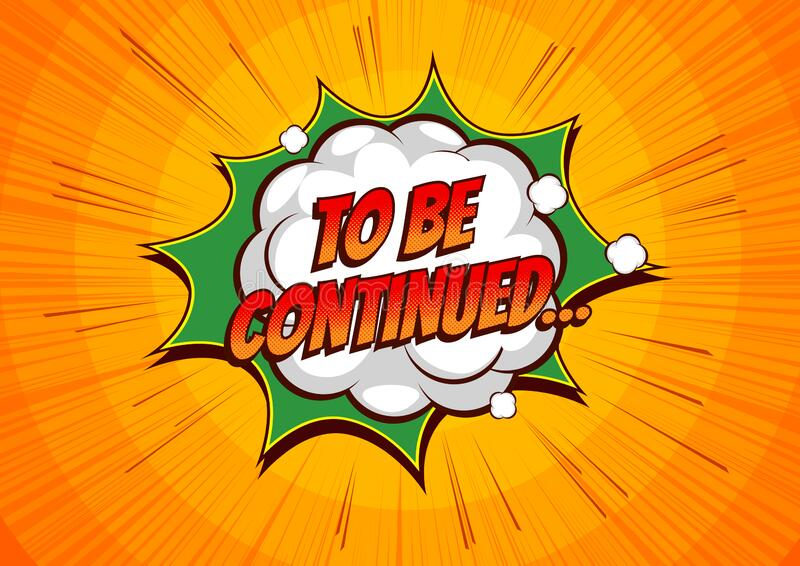